<a href="https://colab.research.google.com/github/dindorios/dindorios/blob/main/ProjetoTransferLearningV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Transfer Learning utilizando o dataset de gatos e cachorros no Google Colab. O Transfer Learning é uma técnica poderosa que permite usar um modelo pré-treinado em uma nova tarefa, economizando tempo e recursos computacionais.

# Passo 1: Configuração do Ambiente
!pip install tensorflow

In [ ]:
# Passo 2: Importação das Bibliotecas Necessárias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
# Passo 3: Carregamento do Dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-12-11 00:38:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 209.85.200.207, 74.125.132.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   207MB/s    in 0.3s    

2024-12-11 00:38:39 (207 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile
with zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/')

In [ ]:
# Passo 4: Pré-processamento dos Dados
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = base_dir + '/train'
validation_dir = base_dir + '/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Passo 5: Construção do Modelo
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Congela as camadas do modelo base

# Adicionando novas camadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

# Compilação do Modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


<ipython-input-6-1232b319be72>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Passo 6: Treinamento do Modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 67s 982ms/step - accuracy: 0.8086 - loss: 0.4034 - val_accuracy: 0.9506 - val_loss: 0.1476
Epoch 2/5
 1/62 ━━━━━━━━━━━━━━━━━━━━ 29s 483ms/step - accuracy: 0.9688 - loss: 0.1324

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9688 - loss: 0.1324 - val_accuracy: 1.0000 - val_loss: 0.0359
Epoch 3/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 55s 878ms/step - accuracy: 0.9555 - loss: 0.1246 - val_accuracy: 0.9546 - val_loss: 0.1325
Epoch 4/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.0800 - val_accuracy: 1.0000 - val_loss: 0.0440
Epoch 5/5
62/62 ━━━━━━━━━━━━━━━━━━━━ 83s 919ms/step - accuracy: 0.9597 - loss: 0.1013 - val_accuracy: 0.9567 - val_loss: 0.1288


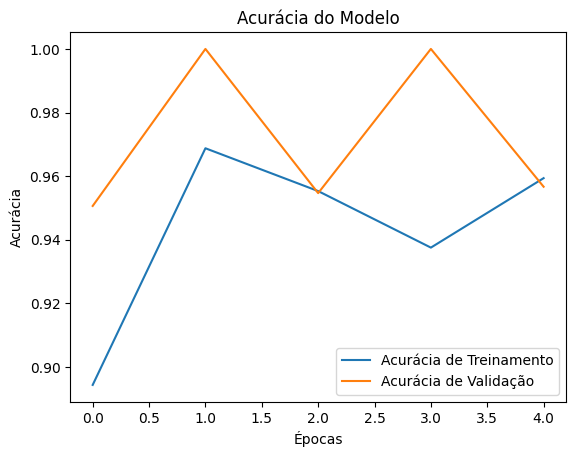

In [ ]:
# Passo 7: Avaliação do Modelo
# Gráfico de Acurácia
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend()
plt.show()

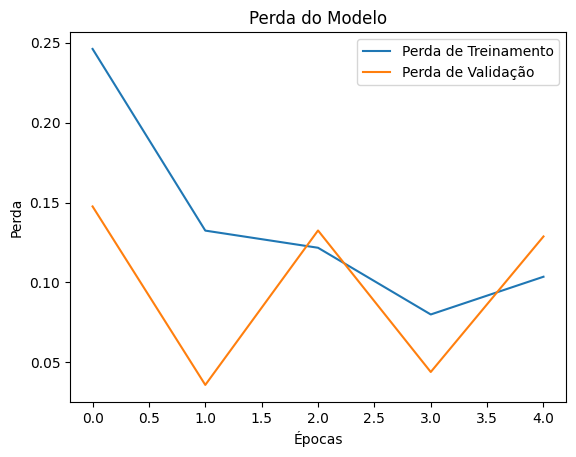

In [ ]:
# Gráfico de Perda
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Épocas')
plt.legend()
plt.show()